In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
sm=pd.read_csv('/content/SM.csv')
sm.head()

,date,Soil_Moisture_%
0,2018-01-02,51.636
1,2018-01-07,55.236
2,2018-01-07,54.017
3,2018-01-14,51.619
4,2018-01-19,54.938


In [ ]:
sm = sm[['date', 'Soil_Moisture_%']]

# Convert date to datetime and extract year and month
sm['date'] = pd.to_datetime(sm['date'])
sm['year'] = sm['date'].dt.year
sm['month'] = sm['date'].dt.month

# Aggregate to monthly averages
sm_monthly = sm.groupby(['year', 'month'])['Soil_Moisture_%'].mean().reset_index()

# Pivot data for plotting
pivot_sm = sm_monthly.pivot(index='month', columns='year', values='Soil_Moisture_%')

# Create Plotly line chart
fig = go.Figure()
colors = [
    '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF',
    '#FF9F40', '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0',
    '#9966FF', '#FF9F40'
]
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

for month, color in zip(pivot_sm.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_sm.columns,
        y=pivot_sm.loc[month],
        mode='lines+markers',
        name=months[month-1],
        line=dict(color=color)
    ))

fig.update_layout(
    title='Monthly Soil Moisture in Patna, Bihar (2017–2024)',
    xaxis_title='Year',
    yaxis_title='Soil Moisture (%)',
    legend_title='Month',
    legend=dict(x=1.05, y=1),
    template='plotly_white'
)
fig.show()

In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
sm = sm[['date', 'Soil_Moisture_%']]

# Convert date to datetime and extract year and month
sm['date'] = pd.to_datetime(sm['date'])
sm['year'] = sm['date'].dt.year
sm['month'] = sm['date'].dt.month

# Aggregate to monthly averages
sm_monthly = sm.groupby(['year', 'month'])['Soil_Moisture_%'].mean().reset_index()

# Pivot data for plotting
pivot_sm = sm_monthly.pivot(index='month', columns='year', values='Soil_Moisture_%')

# Analysis 1: Year with Highest Soil Moisture
yearly_means = sm.groupby('year')['Soil_Moisture_%'].mean().reset_index()
max_year = yearly_means.loc[yearly_means['Soil_Moisture_%'].idxmax()]
print(f"Year with highest average soil moisture: {int(max_year['year'])} ({max_year['Soil_Moisture_%']:.2f}%)")
print("\nYearly Average Soil Moisture (%):")
print(yearly_means.round(2))

# Analysis 2: Months with High/Low Soil Moisture
monthly_means = sm_monthly.groupby('month')['Soil_Moisture_%'].mean().reset_index()
monthly_means['month_name'] = ['January', 'February', 'March', 'April', 'May', 'June',
                              'July', 'August', 'September', 'October', 'November', 'December']
high_month = monthly_means.loc[monthly_means['Soil_Moisture_%'].idxmax()]
low_month = monthly_means.loc[monthly_means['Soil_Moisture_%'].idxmin()]
print(f"\nMonth with highest average soil moisture: {high_month['month_name']} ({high_month['Soil_Moisture_%']:.2f}%)")
print(f"Month with lowest average soil moisture: {low_month['month_name']} ({low_month['Soil_Moisture_%']:.2f}%)")
print("\nMonthly Average Soil Moisture (%) Across Years:")
print(monthly_means[['month_name', 'Soil_Moisture_%']].round(2))

# Visualization 1: Line Chart (Updated with Highlight for Max Year)
fig1 = go.Figure()
colors = [
    '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF',
    '#FF9F40', '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0',
    '#9966FF', '#FF9F40'
]
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

for month, color in zip(pivot_sm.index, colors):
    line_width = 3 if month == high_month['month'] else 1  # Highlight highest month
    fig1.add_trace(go.Scatter(
        x=pivot_sm.columns,
        y=pivot_sm.loc[month],
        mode='lines+markers',
        name=months[month-1],
        line=dict(color=color, width=line_width)
    ))

fig1.update_layout(
    title=f'Monthly Soil Moisture in Patna, Bihar (2017–2024) [Highest Year: {int(max_year["year"])}]',
    xaxis_title='Year',
    yaxis_title='Soil Moisture (%)',
    legend_title='Month',
    legend=dict(x=1.05, y=1),
    template='plotly_white'
)

# Visualization 2: Bar Chart for Yearly Averages
fig2 = px.bar(
    yearly_means,
    x='year',
    y='Soil_Moisture_%',
    title='Average Soil Moisture by Year in Patna, Bihar',
    labels={'year': 'Year', 'Soil_Moisture_%': 'Soil Moisture (%)'},
    color='Soil_Moisture_%',
    color_continuous_scale='Viridis'
)
fig2.update_layout(
    template='plotly_white',
    showlegend=False
)

# Visualization 3: Bar Chart for Monthly Averages
fig3 = px.bar(
    monthly_means,
    x='month_name',
    y='Soil_Moisture_%',
    title='Average Soil Moisture by Month Across Years in Patna, Bihar',
    labels={'month_name': 'Month', 'Soil_Moisture_%': 'Soil Moisture (%)'},
    color='Soil_Moisture_%',
    color_continuous_scale='Viridis'
)
fig3.update_layout(
    template='plotly_white',
    showlegend=False,
    xaxis={'tickangle': 45}
)

# Display all figures
fig1.show()
fig2.show()
fig3.show()

# Statistical Summary
print("\nStatistical Summary by Year:")
print(sm.groupby('year')['Soil_Moisture_%'].describe().round(2))
print("\nStatistical Summary by Month:")
print(sm_monthly.groupby('month')['Soil_Moisture_%'].describe().round(2))

<ipython-input-7-0b07d28cee75>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-0b07d28cee75>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year with highest average soil moisture: 2021 (53.38%)

Yearly Average Soil Moisture (%):
   year  Soil_Moisture_%
0  2018            52.79
1  2019            51.81
2  2020            52.36
3  2021            53.38
4  2022            52.71
5  2023            51.47
6  2024            51.15

Month with highest average soil moisture: April (53.18%)
Month with lowest average soil moisture: September (50.41%)

Monthly Average Soil Moisture (%) Across Years:
   month_name  Soil_Moisture_%
0     January            53.04
1    February            52.70
2       March            52.69
3       April            53.18
4         May            52.81
5        June            51.98
6        July            51.15
7      August            50.52
8   September            50.41
9     October            51.71
10   November            53.06
11   December            53.08



Statistical Summary by Year:
      count   mean   std    min    25%    50%    75%    max
year                                                       
2018   91.0  52.79  2.44  45.52  51.47  52.44  54.24  64.26
2019  115.0  51.81  2.61  41.76  50.64  52.10  53.17  60.41
2020   83.0  52.36  3.85  44.20  50.92  51.93  53.25  68.33
2021   89.0  53.38  3.98  44.72  51.31  52.70  56.66  63.82
2022   78.0  52.71  2.41  45.49  51.44  52.37  52.99  60.56
2023   59.0  51.47  1.39  45.83  51.28  51.89  52.26  52.83
2024   56.0  51.15  1.47  45.44  51.19  51.58  51.94  52.44

Statistical Summary by Month:
       count   mean   std    min    25%    50%    75%    max
month                                                       
1        7.0  53.04  1.07  51.60  52.11  53.52  53.86  54.24
2        7.0  52.70  1.10  51.66  52.19  52.37  52.74  55.04
3        7.0  52.69  0.98  51.77  52.14  52.30  53.02  54.41
4        7.0  53.18  1.17  52.20  52.36  52.55  53.70  55.39
5        7.0  52.81  0.90  51.90 

In [ ]:
soc=pd.read_csv('/content/SOC.csv')
soc.head()

,system:time_start,SOC
0,"Mar 1, 2018",1.129
1,"Dec 1, 2018",1.130
2,"Jan 1, 2019",1.287
3,"Feb 1, 2019",1.785
4,"Mar 1, 2019",1.493


In [ ]:
# Select only system:time_start and SOC columns
soc = soc[['system:time_start', 'SOC']]

# Convert system:time_start to datetime and extract year and month
soc['system:time_start'] = pd.to_datetime(soc['system:time_start'], format='mixed')  # Handle mixed date formats
soc['year'] = soc['system:time_start'].dt.year
soc['month'] = soc['system:time_start'].dt.month

# Aggregate to monthly averages
soc_monthly = soc.groupby(['year', 'month'])['SOC'].mean().reset_index()

# Pivot data for plotting
pivot_soc = soc_monthly.pivot(index='month', columns='year', values='SOC')

# Analysis 1: Year with Highest SOC
yearly_means = soc.groupby('year')['SOC'].mean().reset_index()
max_year = yearly_means.loc[yearly_means['SOC'].idxmax()]
print(f"Year with highest average SOC: {int(max_year['year'])} ({max_year['SOC']:.2f}%)")
print("\nYearly Average SOC (%):")
print(yearly_means.round(2))

# Analysis 2: Months with High/Low SOC
monthly_means = soc_monthly.groupby('month')['SOC'].mean().reset_index()
monthly_means['month_name'] = ['January', 'February', 'March', 'April', 'May', 'June',
                              'July', 'August', 'September', 'October', 'November', 'December']
high_month = monthly_means.loc[monthly_means['SOC'].idxmax()]
low_month = monthly_means.loc[monthly_means['SOC'].idxmin()]
print(f"\nMonth with highest average SOC: {high_month['month_name']} ({high_month['SOC']:.2f}%)")
print(f"Month with lowest average SOC: {low_month['month_name']} ({low_month['SOC']:.2f}%)")
print("\nMonthly Average SOC (%) Across Years:")
print(monthly_means[['month_name', 'SOC']].round(2))

# Visualization 1: Line Chart (Highlighting Max Month)
fig1 = go.Figure()
colors = [
    '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF',
    '#FF9F40', '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0',
    '#9966FF', '#FF9F40'
]
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

for month, color in zip(pivot_soc.index, colors):
    line_width = 3 if month == high_month['month'] else 1  # Highlight highest month
    fig1.add_trace(go.Scatter(
        x=pivot_soc.columns,
        y=pivot_soc.loc[month],
        mode='lines+markers',
        name=months[month-1],
        line=dict(color=color, width=line_width)
    ))

fig1.update_layout(
    title=f'Monthly Soil Organic Carbon in Patna, Bihar (2017–2024) [Highest Year: {int(max_year["year"])}]',
    xaxis_title='Year',
    yaxis_title='Soil Organic Carbon (%)',
    legend_title='Month',
    legend=dict(x=1.05, y=1),
    template='plotly_white'
)

# Visualization 2: Bar Chart for Yearly Averages
fig2 = px.bar(
    yearly_means,
    x='year',
    y='SOC',
    title='Average Soil Organic Carbon by Year in Patna, Bihar',
    labels={'year': 'Year', 'SOC': 'Soil Organic Carbon (%)'},
    color='SOC',
    color_continuous_scale='Viridis'
)
fig2.update_layout(
    template='plotly_white',
    showlegend=False
)

# Visualization 3: Bar Chart for Monthly Averages
fig3 = px.bar(
    monthly_means,
    x='month_name',
    y='SOC',
    title='Average Soil Organic Carbon by Month Across Years in Patna, Bihar',
    labels={'month_name': 'Month', 'SOC': 'Soil Organic Carbon (%)'},
    color='SOC',
    color_continuous_scale='Viridis'
)
fig3.update_layout(
    template='plotly_white',
    showlegend=False,
    xaxis={'tickangle': 45}
)

# Display all figures
fig1.show()
fig2.show()
fig3.show()

# Statistical Summary
print("\nStatistical Summary by Year:")
print(soc.groupby('year')['SOC'].describe().round(2))
print("\nStatistical Summary by Month:")
print(soc_monthly.groupby('month')['SOC'].describe().round(2))

Year with highest average SOC: 2020 (1.39%)

Yearly Average SOC (%):
   year   SOC
0  2018  1.13
1  2019  1.15
2  2020  1.39
3  2021  1.29
4  2022  0.85
5  2023  0.88
6  2024  0.82

Month with highest average SOC: February (1.56%)
Month with lowest average SOC: May (0.59%)

Monthly Average SOC (%) Across Years:
   month_name   SOC
0     January  1.24
1    February  1.56
2       March  1.23
3       April  0.66
4         May  0.59
5        June  0.65
6        July  0.90
7      August  1.45
8   September  1.42
9     October  1.40
10   November  0.92
11   December  0.88



Statistical Summary by Year:
      count  mean   std   min   25%   50%   75%   max
year                                                 
2018    2.0  1.13  0.00  1.13  1.13  1.13  1.13  1.13
2019   12.0  1.15  0.41  0.53  0.88  1.16  1.47  1.78
2020   12.0  1.39  0.43  0.92  1.01  1.35  1.71  2.04
2021   12.0  1.29  0.47  0.60  1.00  1.18  1.74  2.07
2022   11.0  0.85  0.33  0.46  0.58  0.78  1.18  1.33
2023   11.0  0.88  0.32  0.43  0.63  0.89  1.16  1.30
2024   11.0  0.82  0.33  0.43  0.54  0.73  1.15  1.24

Statistical Summary by Month:
       count  mean   std   min   25%   50%   75%   max
month                                                 
1        6.0  1.24  0.26  0.94  1.06  1.27  1.30  1.67
2        6.0  1.56  0.33  1.22  1.26  1.56  1.79  1.98
3        7.0  1.23  0.24  0.89  1.12  1.14  1.38  1.60
4        6.0  0.66  0.17  0.50  0.51  0.64  0.75  0.92
5        6.0  0.59  0.20  0.43  0.47  0.53  0.62  0.97
6        6.0  0.65  0.27  0.43  0.46  0.52  0.85  1.03
7        4.0 

In [ ]:
ph=pd.read_csv('/content/PH.csv')
ph.head()

,system:time_start,pH
0,"Mar 1, 2018",6.418
1,"Dec 1, 2018",6.445
2,"Jan 1, 2019",6.455
3,"Feb 1, 2019",6.431
4,"Mar 1, 2019",6.407


In [ ]:
ph = ph[['system:time_start', 'pH']]

# Convert system:time_start to datetime and extract year and month
ph['system:time_start'] = pd.to_datetime(ph['system:time_start'], format='mixed')  # Handle mixed date formats
ph['year'] = ph['system:time_start'].dt.year
ph['month'] = ph['system:time_start'].dt.month

# Aggregate to monthly averages
ph_monthly = ph.groupby(['year', 'month'])['pH'].mean().reset_index()

# Pivot data for plotting
pivot_ph = ph_monthly.pivot(index='month', columns='year', values='pH')

# Analysis 1: Year with Highest pH
yearly_means = ph.groupby('year')['pH'].mean().reset_index()
max_year = yearly_means.loc[yearly_means['pH'].idxmax()]
print(f"Year with highest average pH: {int(max_year['year'])} ({max_year['pH']:.2f})")
print("\nYearly Average pH:")
print(yearly_means.round(2))

# Analysis 2: Months with High/Low pH
monthly_means = ph_monthly.groupby('month')['pH'].mean().reset_index()
monthly_means['month_name'] = ['January', 'February', 'March', 'April', 'May', 'June',
                              'July', 'August', 'September', 'October', 'November', 'December']
high_month = monthly_means.loc[monthly_means['pH'].idxmax()]
low_month = monthly_means.loc[monthly_means['pH'].idxmin()]
print(f"\nMonth with highest average pH: {high_month['month_name']} ({high_month['pH']:.2f})")
print(f"Month with lowest average pH: {low_month['month_name']} ({low_month['pH']:.2f})")
print("\nMonthly Average pH Across Years:")
print(monthly_means[['month_name', 'pH']].round(2))

# Visualization 1: Line Chart (Highlighting Max Month)
fig1 = go.Figure()
colors = [
    '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF',
    '#FF9F40', '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0',
    '#9966FF', '#FF9F40'
]
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

for month, color in zip(pivot_ph.index, colors):
    line_width = 3 if month == high_month['month'] else 1  # Highlight highest month
    fig1.add_trace(go.Scatter(
        x=pivot_ph.columns,
        y=pivot_ph.loc[month],
        mode='lines+markers',
        name=months[month-1],
        line=dict(color=color, width=line_width)
    ))

fig1.update_layout(
    title=f'Monthly Soil pH in Patna, Bihar (2017–2024) [Highest Year: {int(max_year["year"])}]',
    xaxis_title='Year',
    yaxis_title='Soil pH',
    legend_title='Month',
    legend=dict(x=1.05, y=1),
    template='plotly_white'
)

# Visualization 2: Bar Chart for Yearly Averages
fig2 = px.bar(
    yearly_means,
    x='year',
    y='pH',
    title='Average Soil pH by Year in Patna, Bihar',
    labels={'year': 'Year', 'pH': 'Soil pH'},
    color='pH',
    color_continuous_scale='Viridis'
)
fig2.update_layout(
    template='plotly_white',
    showlegend=False
)

# Visualization 3: Bar Chart for Monthly Averages
fig3 = px.bar(
    monthly_means,
    x='month_name',
    y='pH',
    title='Average Soil pH by Month Across Years in Patna, Bihar',
    labels={'month_name': 'Month', 'pH': 'Soil pH'},
    color='pH',
    color_continuous_scale='Viridis'
)
fig3.update_layout(
    template='plotly_white',
    showlegend=False,
    xaxis={'tickangle': 45}
)

# Display all figures
fig1.show()
fig2.show()
fig3.show()

# Statistical Summary
print("\nStatistical Summary by Year:")
print(ph.groupby('year')['pH'].describe().round(2))
print("\nStatistical Summary by Month:")
print(ph_monthly.groupby('month')['pH'].describe().round(2))

Year with highest average pH: 2021 (6.44)

Yearly Average pH:
   year    pH
0  2018  6.43
1  2019  6.43
2  2020  6.43
3  2021  6.44
4  2022  6.44
5  2023  6.42
6  2024  6.43

Month with highest average pH: July (6.51)
Month with lowest average pH: June (6.37)

Monthly Average pH Across Years:
   month_name    pH
0     January  6.45
1    February  6.43
2       March  6.41
3       April  6.38
4         May  6.37
5        June  6.37
6        July  6.51
7      August  6.47
8   September  6.49
9     October  6.45
10   November  6.43
11   December  6.44



Statistical Summary by Year:
      count  mean   std   min   25%   50%   75%   max
year                                                 
2018    2.0  6.43  0.02  6.42  6.42  6.43  6.44  6.44
2019   12.0  6.43  0.04  6.37  6.40  6.43  6.45  6.49
2020   12.0  6.43  0.05  6.37  6.41  6.44  6.45  6.54
2021   12.0  6.44  0.04  6.38  6.42  6.44  6.46  6.53
2022   11.0  6.44  0.06  6.35  6.39  6.43  6.46  6.55
2023   11.0  6.42  0.04  6.36  6.39  6.43  6.44  6.51
2024   11.0  6.43  0.05  6.36  6.40  6.42  6.45  6.55

Statistical Summary by Month:
       count  mean   std   min   25%   50%   75%   max
month                                                 
1        6.0  6.45  0.01  6.43  6.44  6.45  6.46  6.47
2        6.0  6.43  0.01  6.43  6.43  6.43  6.43  6.45
3        7.0  6.41  0.01  6.41  6.41  6.42  6.42  6.42
4        6.0  6.38  0.01  6.36  6.38  6.38  6.38  6.40
5        6.0  6.37  0.00  6.36  6.37  6.37  6.37  6.38
6        6.0  6.37  0.02  6.35  6.36  6.36  6.38  6.39
7        4.0 

In [ ]:
# Load soil moisture and SOC CSVs
sm = pd.read_csv('/content/SM.csv')
sm = sm[['date', 'Soil_Moisture_%']]
sm['date'] = pd.to_datetime(sm['date'])
sm['year'] = sm['date'].dt.year
sm['month'] = sm['date'].dt.month
sm_monthly = sm.groupby(['year', 'month'])['Soil_Moisture_%'].mean().reset_index()
pivot_sm = sm_monthly.pivot(index='month', columns='year', values='Soil_Moisture_%')

soc = pd.read_csv('/content/SOC.csv')
soc = soc[['system:time_start', 'SOC']]
soc['system:time_start'] = pd.to_datetime(soc['system:time_start'], format='mixed')
soc['year'] = soc['system:time_start'].dt.year
soc['month'] = soc['system:time_start'].dt.month
soc_monthly = soc.groupby(['year', 'month'])['SOC'].mean().reset_index()
pivot_soc = soc_monthly.pivot(index='month', columns='year', values='SOC')

# Correlation Analysis
merged = ph_monthly.merge(sm_monthly, on=['year', 'month'], how='inner').merge(soc_monthly, on=['year', 'month'], how='inner')
correlation_ph_sm = merged['pH'].corr(merged['Soil_Moisture_%'])
correlation_ph_soc = merged['pH'].corr(merged['SOC'])
print(f"\nCorrelation between pH and Soil Moisture: {correlation_ph_sm:.2f}")
print(f"Correlation between pH and SOC: {correlation_ph_soc:.2f}")

# Triple-axis Plotly chart (pH on right, Moisture and SOC on left)
fig = go.Figure()
for month, color in zip(pivot_ph.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_ph.columns,
        y=pivot_ph.loc[month],
        mode='lines+markers',
        name=f'{months[month-1]} (pH)',
        line=dict(color=color, dash='dash'),
        yaxis='y2'
    ))
for month, color in zip(pivot_sm.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_sm.columns,
        y=pivot_sm.loc[month],
        mode='lines+markers',
        name=f'{months[month-1]} (Moisture)',
        line=dict(color=color)
    ))
for month, color in zip(pivot_soc.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_soc.columns,
        y=pivot_soc.loc[month],
        mode='lines+markers',
        name=f'{months[month-1]} (SOC)',
        line=dict(color=color, dash='dot')
    ))
fig.update_layout(
    title='Soil pH, Moisture, and SOC in Patna, Bihar (2017–2024)',
    xaxis_title='Year',
    yaxis=dict(title='Soil Moisture (%) / SOC (%)'),
    yaxis2=dict(title='Soil pH', overlaying='y', side='right'),
    legend_title='Parameter',
    legend=dict(x=1.1, y=1),
    template='plotly_white'
)
fig.show()


Correlation between pH and Soil Moisture: -0.41
Correlation between pH and SOC: 0.41


In [ ]:
cec=pd.read_csv('/content/ECE.csv')
cec.head()

,system:time_start,CEC
0,"Mar 1, 2018",12.011
1,"Dec 1, 2018",11.148
2,"Jan 1, 2019",11.288
3,"Feb 1, 2019",11.477
4,"Mar 1, 2019",11.196


In [ ]:
# Select only system:time_start and CEC columns
cec = cec[['system:time_start', 'CEC']]

# Convert system:time_start to datetime and extract year and month
cec['system:time_start'] = pd.to_datetime(cec['system:time_start'], format='mixed')  # Handle mixed date formats
cec['year'] = cec['system:time_start'].dt.year
cec['month'] = cec['system:time_start'].dt.month

# Aggregate to monthly averages
cec_monthly = cec.groupby(['year', 'month'])['CEC'].mean().reset_index()

# Pivot data for plotting
pivot_cec = cec_monthly.pivot(index='month', columns='year', values='CEC')

# Analysis 1: Year with Highest CEC
yearly_means = cec.groupby('year')['CEC'].mean().reset_index()
max_year = yearly_means.loc[yearly_means['CEC'].idxmax()]
print(f"Year with highest average CEC: {int(max_year['year'])} ({max_year['CEC']:.2f} cmol/kg)")
print("\nYearly Average CEC (cmol/kg):")
print(yearly_means.round(2))

# Analysis 2: Months with High/Low CEC
monthly_means = cec_monthly.groupby('month')['CEC'].mean().reset_index()
monthly_means['month_name'] = ['January', 'February', 'March', 'April', 'May', 'June',
                              'July', 'August', 'September', 'October', 'November', 'December']
high_month = monthly_means.loc[monthly_means['CEC'].idxmax()]
low_month = monthly_means.loc[monthly_means['CEC'].idxmin()]
print(f"\nMonth with highest average CEC: {high_month['month_name']} ({high_month['CEC']:.2f} cmol/kg)")
print(f"Month with lowest average CEC: {low_month['month_name']} ({low_month['CEC']:.2f} cmol/kg)")
print("\nMonthly Average CEC (cmol/kg) Across Years:")
print(monthly_means[['month_name', 'CEC']].round(2))

# Visualization 1: Line Chart (Highlighting Max Month)
fig1 = go.Figure()
colors = [
    '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF',
    '#FF9F40', '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0',
    '#9966FF', '#FF9F40'
]
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

for month, color in zip(pivot_cec.index, colors):
    line_width = 3 if month == high_month['month'] else 1  # Highlight highest month
    fig1.add_trace(go.Scatter(
        x=pivot_cec.columns,
        y=pivot_cec.loc[month],
        mode='lines+markers',
        name=months[month-1],
        line=dict(color=color, width=line_width)
    ))

fig1.update_layout(
    title=f'Monthly Soil Cation Exchange Capacity in Patna, Bihar (2017–2024) [Highest Year: {int(max_year["year"])}]',
    xaxis_title='Year',
    yaxis_title='Cation Exchange Capacity (cmol/kg)',
    legend_title='Month',
    legend=dict(x=1.05, y=1),
    template='plotly_white'
)

# Visualization 2: Bar Chart for Yearly Averages
fig2 = px.bar(
    yearly_means,
    x='year',
    y='CEC',
    title='Average Soil Cation Exchange Capacity by Year in Patna, Bihar',
    labels={'year': 'Year', 'CEC': 'Cation Exchange Capacity (cmol/kg)'},
    color='CEC',
    color_continuous_scale='Viridis'
)
fig2.update_layout(
    template='plotly_white',
    showlegend=False
)

# Visualization 3: Bar Chart for Monthly Averages
fig3 = px.bar(
    monthly_means,
    x='month_name',
    y='CEC',
    title='Average Soil Cation Exchange Capacity by Month Across Years in Patna, Bihar',
    labels={'month_name': 'Month', 'CEC': 'Cation Exchange Capacity (cmol/kg)'},
    color='CEC',
    color_continuous_scale='Viridis'
)
fig3.update_layout(
    template='plotly_white',
    showlegend=False,
    xaxis={'tickangle': 45}
)

# Display all figures
fig1.show()
fig2.show()
fig3.show()

# Statistical Summary
print("\nStatistical Summary by Year:")
print(cec.groupby('year')['CEC'].describe().round(2))
print("\nStatistical Summary by Month:")
print(cec_monthly.groupby('month')['CEC'].describe().round(2))

Year with highest average CEC: 2024 (11.85 cmol/kg)

Yearly Average CEC (cmol/kg):
   year    CEC
0  2018  11.58
1  2019  11.20
2  2020  11.29
3  2021  11.25
4  2022  11.82
5  2023  11.84
6  2024  11.85

Month with highest average CEC: February (11.81 cmol/kg)
Month with lowest average CEC: April (11.28 cmol/kg)

Monthly Average CEC (cmol/kg) Across Years:
   month_name    CEC
0     January  11.55
1    February  11.81
2       March  11.60
3       April  11.28
4         May  11.35
5        June  11.44
6        July  11.49
7      August  11.72
8   September  11.78
9     October  11.68
10   November  11.40
11   December  11.31



Statistical Summary by Year:
      count   mean   std    min    25%    50%    75%    max
year                                                       
2018    2.0  11.58  0.61  11.15  11.36  11.58  11.80  12.01
2019   12.0  11.20  0.20  10.93  11.02  11.19  11.33  11.54
2020   12.0  11.29  0.23  11.00  11.11  11.25  11.48  11.62
2021   12.0  11.25  0.20  10.97  11.12  11.22  11.37  11.69
2022   11.0  11.82  0.19  11.55  11.69  11.77  11.93  12.22
2023   11.0  11.84  0.21  11.58  11.70  11.76  12.02  12.23
2024   11.0  11.85  0.22  11.58  11.67  11.82  12.00  12.18

Statistical Summary by Month:
       count   mean   std    min    25%    50%    75%    max
month                                                       
1        6.0  11.55  0.29  11.16  11.33  11.57  11.78  11.86
2        6.0  11.81  0.36  11.38  11.51  11.84  12.10  12.22
3        7.0  11.60  0.39  11.17  11.20  11.76  11.93  12.01
4        6.0  11.28  0.33  10.93  11.01  11.28  11.57  11.58
5        6.0  11.35  0.32  10.99 

In [ ]:
bd=pd.read_csv('/content/BD.csv')
bd.head()

,system:time_start,BD
0,"Mar 1, 2018",1.441
1,"Dec 1, 2018",1.426
2,"Jan 1, 2019",1.423
3,"Feb 1, 2019",1.421
4,"Mar 1, 2019",1.428


In [ ]:
# Select only system:time_start and BD columns
bd = bd[['system:time_start', 'BD']]

# Convert system:time_start to datetime and extract year and month
bd['system:time_start'] = pd.to_datetime(bd['system:time_start'], format='mixed')  # Handle mixed date formats
bd['year'] = bd['system:time_start'].dt.year
bd['month'] = bd['system:time_start'].dt.month

# Aggregate to monthly averages
bd_monthly = bd.groupby(['year', 'month'])['BD'].mean().reset_index()

# Pivot data for plotting
pivot_bd = bd_monthly.pivot(index='month', columns='year', values='BD')

# Analysis 1: Year with Highest BD
yearly_means = bd.groupby('year')['BD'].mean().reset_index()
max_year = yearly_means.loc[yearly_means['BD'].idxmax()]
print(f"Year with highest average BD: {int(max_year['year'])} ({max_year['BD']:.2f} g/cm³)")
print("\nYearly Average BD (g/cm³):")
print(yearly_means.round(2))

# Analysis 2: Months with High/Low BD
monthly_means = bd_monthly.groupby('month')['BD'].mean().reset_index()
monthly_means['month_name'] = ['January', 'February', 'March', 'April', 'May', 'June',
                              'July', 'August', 'September', 'October', 'November', 'December']
high_month = monthly_means.loc[monthly_means['BD'].idxmax()]
low_month = monthly_means.loc[monthly_means['BD'].idxmin()]
print(f"\nMonth with highest average BD: {high_month['month_name']} ({high_month['BD']:.2f} g/cm³)")
print(f"Month with lowest average BD: {low_month['month_name']} ({low_month['BD']:.2f} g/cm³)")
print("\nMonthly Average BD (g/cm³) Across Years:")
print(monthly_means[['month_name', 'BD']].round(2))

# Visualization 1: Line Chart (Highlighting Max Month)
fig1 = go.Figure()
colors = [
    '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF',
    '#FF9F40', '#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0',
    '#9966FF', '#FF9F40'
]
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

for month, color in zip(pivot_bd.index, colors):
    line_width = 3 if month == high_month['month'] else 1  # Highlight highest month
    fig1.add_trace(go.Scatter(
        x=pivot_bd.columns,
        y=pivot_bd.loc[month],
        mode='lines+markers',
        name=months[month-1],
        line=dict(color=color, width=line_width)
    ))

fig1.update_layout(
    title=f'Monthly Soil Bulk Density in Patna, Bihar (2017–2024) [Highest Year: {int(max_year["year"])}]',
    xaxis_title='Year',
    yaxis_title='Bulk Density (g/cm³)',
    legend_title='Month',
    legend=dict(x=1.05, y=1),
    template='plotly_white'
)

# Visualization 2: Bar Chart for Yearly Averages
fig2 = px.bar(
    yearly_means,
    x='year',
    y='BD',
    title='Average Soil Bulk Density by Year in Patna, Bihar',
    labels={'year': 'Year', 'BD': 'Bulk Density (g/cm³)'},
    color='BD',
    color_continuous_scale='Viridis'
)
fig2.update_layout(
    template='plotly_white',
    showlegend=False
)

# Visualization 3: Bar Chart for Monthly Averages
fig3 = px.bar(
    monthly_means,
    x='month_name',
    y='BD',
    title='Average Soil Bulk Density by Month Across Years in Patna, Bihar',
    labels={'month_name': 'Month', 'BD': 'Bulk Density (g/cm³)'},
    color='BD',
    color_continuous_scale='Viridis'
)
fig3.update_layout(
    template='plotly_white',
    showlegend=False,
    xaxis={'tickangle': 45}
)

# Display all figures
fig1.show()
fig2.show()
fig3.show()

# Statistical Summary
print("\nStatistical Summary by Year:")
print(bd.groupby('year')['BD'].describe().round(2))
print("\nStatistical Summary by Month:")
print(bd_monthly.groupby('month')['BD'].describe().round(2))

Year with highest average BD: 2023 (1.44 g/cm³)

Yearly Average BD (g/cm³):
   year    BD
0  2018  1.43
1  2019  1.43
2  2020  1.42
3  2021  1.42
4  2022  1.44
5  2023  1.44
6  2024  1.44

Month with highest average BD: June (1.45 g/cm³)
Month with lowest average BD: September (1.42 g/cm³)

Monthly Average BD (g/cm³) Across Years:
   month_name    BD
0     January  1.43
1    February  1.43
2       March  1.44
3       April  1.45
4         May  1.45
5        June  1.45
6        July  1.42
7      August  1.42
8   September  1.42
9     October  1.42
10   November  1.43
11   December  1.43



Statistical Summary by Year:
      count  mean   std   min   25%   50%   75%   max
year                                                 
2018    2.0  1.43  0.01  1.43  1.43  1.43  1.44  1.44
2019   12.0  1.43  0.01  1.41  1.42  1.43  1.43  1.45
2020   12.0  1.42  0.01  1.41  1.42  1.42  1.43  1.44
2021   12.0  1.42  0.01  1.41  1.41  1.42  1.43  1.45
2022   11.0  1.44  0.01  1.42  1.43  1.44  1.45  1.46
2023   11.0  1.44  0.01  1.42  1.44  1.44  1.45  1.47
2024   11.0  1.44  0.01  1.43  1.43  1.44  1.45  1.47

Statistical Summary by Month:
       count  mean   std   min   25%   50%   75%   max
month                                                 
1        6.0  1.43  0.01  1.42  1.42  1.42  1.43  1.44
2        6.0  1.43  0.01  1.42  1.42  1.43  1.43  1.44
3        7.0  1.44  0.01  1.42  1.43  1.44  1.44  1.44
4        6.0  1.45  0.01  1.44  1.44  1.45  1.46  1.46
5        6.0  1.45  0.01  1.44  1.45  1.45  1.46  1.46
6        6.0  1.45  0.01  1.44  1.44  1.46  1.47  1.47
7        4.0 

In [ ]:
# Multi-axis Plotly chart (BD, pH, CEC on right; Moisture, SOC on left)
fig = go.Figure()
for month, color in zip(pivot_bd.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_bd.columns,
        y=pivot_bd.loc[month],
        mode='lines+markers',
        name=f'{months[month-1]} (BD)',
        line=dict(color=color, dash='dash'),
        yaxis='y2'
    ))
for month, color in zip(pivot_ph.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_ph.columns,
        y=pivot_ph.loc[month],
        mode='lines+markers',
        name=f'{months[month-1]} (pH)',
        line=dict(color=color, dash='dot'),
        yaxis='y2'
    ))
for month, color in zip(pivot_cec.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_cec.columns,
        y=pivot_cec.loc[month],
        mode='lines+markers',
        name=f'{months[month-1]} (CEC)',
        line=dict(color=color, dash='longdash'),
        yaxis='y2'
    ))
for month, color in zip(pivot_sm.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_sm.columns,
        y=pivot_sm.loc[month],
        mode='lines+markers',
        name=f'{months[month-1]} (Moisture)',
        line=dict(color=color)
    ))
for month, color in zip(pivot_soc.index, colors):
    fig.add_trace(go.Scatter(
        x=pivot_soc.columns,
        y=pivot_soc.loc[month],
        mode='lines+markers',
        name=f'{months[month-1]} (SOC)',
        line=dict(color=color, dash='solid')
    ))
fig.update_layout(
    title='Soil BD, pH, CEC, Moisture, and SOC in Patna, Bihar (2017–2024)',
    xaxis_title='Year',
    yaxis=dict(title='Soil Moisture (%) / SOC (%)'),
    yaxis2=dict(title='BD (g/cm³) / pH / CEC (cmol/kg)', overlaying='y', side='right'),
    legend_title='Parameter',
    legend=dict(x=1.1, y=1),
    template='plotly_white'
)
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

# Load all CSVs
try:
    sm = pd.read_csv('/content/SM.csv')
    soc = pd.read_csv('/content/SOC.csv')
    ph = pd.read_csv('/content/PH.csv')
    cec = pd.read_csv('/content/ECE.csv')
    bd = pd.read_csv('/content/BD.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Ensure CSVs are in '/content/' or update paths.")
    raise

# Select relevant columns
sm = sm[['date', 'Soil_Moisture_%']]
soc = soc[['system:time_start', 'SOC']]
ph = ph[['system:time_start', 'pH']]
cec = cec[['system:time_start', 'CEC']]
bd = bd[['system:time_start', 'BD']]

# Convert dates to datetime and extract year, month
sm['date'] = pd.to_datetime(sm['date'], format='mixed')
sm['year'] = sm['date'].dt.year
sm['month'] = sm['date'].dt.month

for df in [soc, ph, cec, bd]:
    df['system:time_start'] = pd.to_datetime(df['system:time_start'], format='mixed')
    df['year'] = df['system:time_start'].dt.year
    df['month'] = df['system:time_start'].dt.month

# Aggregate to monthly averages
sm_monthly = sm.groupby(['year', 'month'])['Soil_Moisture_%'].mean().reset_index()
soc_monthly = soc.groupby(['year', 'month'])['SOC'].mean().reset_index()
ph_monthly = ph.groupby(['year', 'month'])['pH'].mean().reset_index()
cec_monthly = cec.groupby(['year', 'month'])['CEC'].mean().reset_index()
bd_monthly = bd.groupby(['year', 'month'])['BD'].mean().reset_index()

# Merge datasets on year and month
merged = sm_monthly.merge(soc_monthly, on=['year', 'month'], how='inner') \
                   .merge(ph_monthly, on=['year', 'month'], how='inner') \
                   .merge(cec_monthly, on=['year', 'month'], how='inner') \
                   .merge(bd_monthly, on=['year', 'month'], how='inner')

# Check for sufficient data
if len(merged) < 2:
    print("Error: Insufficient overlapping data after merging. Check data coverage.")
    print("Available year-month pairs:", merged[['year', 'month']].value_counts().sort_index())
    raise ValueError("Need at least 2 overlapping year-month pairs for correlation.")

# Compute Pearson correlation matrix
corr_matrix = merged[['Soil_Moisture_%', 'SOC', 'pH', 'CEC', 'BD']].corr(method='pearson')

# Create heatmap with Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',  # Red (negative) to Blue (positive)
    zmin=-1, zmax=1,   # Correlation range
    text=corr_matrix.values.round(2),  # Display rounded values
    texttemplate="%{text}",
    textfont=dict(size=12),
))

fig.update_layout(
    title='Correlation Heatmap of Soil Parameters in Patna, Bihar (Monthly Averages)',
    xaxis_title='Soil Parameters',
    yaxis_title='Soil Parameters',
    xaxis=dict(tickangle=45),
    yaxis=dict(autorange='reversed'),  # Flip y-axis for standard heatmap orientation
    template='plotly_white',
    width=600,
    height=600
)

# Show figure
fig.show()

# Print correlation matrix for reference
print("\nCorrelation Matrix:")
print(corr_matrix.round(2))


Correlation Matrix:
                 Soil_Moisture_%   SOC    pH   CEC    BD
Soil_Moisture_%             1.00 -0.10 -0.41 -0.46  0.18
SOC                        -0.10  1.00  0.41 -0.00 -0.81
pH                         -0.41  0.41  1.00  0.25 -0.78
CEC                        -0.46 -0.00  0.25  1.00  0.16
BD                          0.18 -0.81 -0.78  0.16  1.00


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load all CSVs
try:
    sm = pd.read_csv('/content/SM.csv')
    soc = pd.read_csv('/content/SOC.csv')
    ph = pd.read_csv('/content/PH.csv')
    cec = pd.read_csv('/content/ECE.csv')
    bd = pd.read_csv('/content/BD.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Ensure CSVs are in '/content/' or update paths.")
    raise

# Select relevant columns
sm = sm[['date', 'Soil_Moisture_%']]
soc = soc[['system:time_start', 'SOC']]
ph = ph[['system:time_start', 'pH']]
cec = cec[['system:time_start', 'CEC']]
bd = bd[['system:time_start', 'BD']]

# Convert dates to datetime and extract year, month
sm['date'] = pd.to_datetime(sm['date'], format='mixed')
sm['year'] = sm['date'].dt.year
sm['month'] = sm['date'].dt.month

for df in [soc, ph, cec, bd]:
    df['system:time_start'] = pd.to_datetime(df['system:time_start'], format='mixed')
    df['year'] = df['system:time_start'].dt.year
    df['month'] = df['system:time_start'].dt.month

# Aggregate to monthly averages
sm_monthly = sm.groupby(['year', 'month'])['Soil_Moisture_%'].mean().reset_index()
soc_monthly = soc.groupby(['year', 'month'])['SOC'].mean().reset_index()
ph_monthly = ph.groupby(['year', 'month'])['pH'].mean().reset_index()
cec_monthly = cec.groupby(['year', 'month'])['CEC'].mean().reset_index()
bd_monthly = bd.groupby(['year', 'month'])['BD'].mean().reset_index()

# Merge datasets on year and month
merged = sm_monthly.merge(soc_monthly, on=['year', 'month'], how='inner') \
                   .merge(ph_monthly, on=['year', 'month'], how='inner') \
                   .merge(cec_monthly, on=['year', 'month'], how='inner') \
                   .merge(bd_monthly, on=['year', 'month'], how='inner')

# Check for sufficient data
if len(merged) < 2:
    print("Error: Insufficient overlapping data after merging.")
    print("Available year-month pairs:", merged[['year', 'month']].value_counts().sort_index())
    raise ValueError("Need at least 2 overlapping year-month pairs for correlation.")

# Assign seasons
def get_season(month):
    if month in [6, 7, 8, 9]:
        return 'Monsoon'
    elif month in [10, 11, 12, 1]:
        return 'Post-Monsoon'
    elif month in [2, 3, 4, 5]:
        return 'Pre-Monsoon'
    return None

merged['season'] = merged['month'].apply(get_season)

# Compute and visualize correlations for each season
seasons = ['Monsoon', 'Post-Monsoon', 'Pre-Monsoon']
parameters = ['Soil_Moisture_%', 'SOC', 'pH', 'CEC', 'BD']

for season in seasons:
    # Filter data for the season
    season_data = merged[merged['season'] == season]

    # Check if enough data points exist
    if len(season_data) < 2:
        print(f"Warning: Insufficient data for {season}. Skipping correlation.")
        continue

    # Compute Pearson correlation matrix
    corr_matrix = season_data[parameters].corr(method='pearson')

    # Create heatmap
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        colorscale='RdBu',  # Red (negative) to Blue (positive)
        zmin=-1, zmax=1,   # Correlation range
        text=corr_matrix.values.round(2),
        texttemplate="%{text}",
        textfont=dict(size=12),
    ))

    fig.update_layout(
        title=f'Correlation Heatmap of Soil Parameters in Patna, Bihar ({season})',
        xaxis_title='Soil Parameters',
        yaxis_title='Soil Parameters',
        xaxis=dict(tickangle=45),
        yaxis=dict(autorange='reversed'),
        template='plotly_white',
        width=600,
        height=600
    )

    # Show figure
    fig.show()

    # Print correlation matrix
    print(f"\nCorrelation Matrix for {season}:")
    print(corr_matrix.round(2))

# Data coverage summary
print("\nData Coverage by Season:")
for season in seasons:
    count = len(merged[merged['season'] == season])
    print(f"{season}: {count} year-month pairs")


Correlation Matrix for Monsoon:
                 Soil_Moisture_%   SOC    pH   CEC    BD
Soil_Moisture_%             1.00 -0.30 -0.55 -0.30  0.51
SOC                        -0.30  1.00  0.24 -0.04 -0.74
pH                         -0.55  0.24  1.00  0.36 -0.77
CEC                        -0.30 -0.04  0.36  1.00  0.04
BD                          0.51 -0.74 -0.77  0.04  1.00



Correlation Matrix for Post-Monsoon:
                 Soil_Moisture_%   SOC    pH   CEC    BD
Soil_Moisture_%             1.00  0.14 -0.04 -0.68 -0.35
SOC                         0.14  1.00  0.73 -0.20 -0.88
pH                         -0.04  0.73  1.00 -0.13 -0.78
CEC                        -0.68 -0.20 -0.13  1.00  0.58
BD                         -0.35 -0.88 -0.78  0.58  1.00



Correlation Matrix for Pre-Monsoon:
                 Soil_Moisture_%   SOC    pH   CEC    BD
Soil_Moisture_%             1.00 -0.03  0.00 -0.35 -0.12
SOC                        -0.03  1.00  0.83  0.13 -0.94
pH                          0.00  0.83  1.00  0.46 -0.80
CEC                        -0.35  0.13  0.46  1.00  0.10
BD                         -0.12 -0.94 -0.80  0.10  1.00

Data Coverage by Season:
Monsoon: 21 year-month pairs
Post-Monsoon: 25 year-month pairs
Pre-Monsoon: 25 year-month pairs


In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load CSVs
try:
    soc = pd.read_csv('/content/SOC.csv')
    bd = pd.read_csv('/content/BD.csv')
    sm = pd.read_csv('/content/SM.csv')
    ph = pd.read_csv('/content/PH.csv')
    cec = pd.read_csv('/content/ECE.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Ensure CSVs are in '/content/' or update paths.")
    raise

# Select relevant columns
soc = soc[['system:time_start', 'SOC']]
bd = bd[['system:time_start', 'BD']]
sm = sm[['date', 'Soil_Moisture_%']]
ph = ph[['system:time_start', 'pH']]
cec = cec[['system:time_start', 'CEC']]

# Convert dates to datetime
soc['system:time_start'] = pd.to_datetime(soc['system:time_start'], format='mixed')
bd['system:time_start'] = pd.to_datetime(bd['system:time_start'], format='mixed')
sm['date'] = pd.to_datetime(sm['date'], format='mixed')
ph['system:time_start'] = pd.to_datetime(ph['system:time_start'], format='mixed')
cec['system:time_start'] = pd.to_datetime(cec['system:time_start'], format='mixed')

# Extract year and month
for df, date_col in [(soc, 'system:time_start'), (bd, 'system:time_start'),
                     (sm, 'date'), (ph, 'system:time_start'), (cec, 'system:time_start')]:
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month

# Aggregate to monthly averages
soc_monthly = soc.groupby(['year', 'month'])['SOC'].mean().reset_index()
bd_monthly = bd.groupby(['year', 'month'])['BD'].mean().reset_index()
sm_monthly = sm.groupby(['year', 'month'])['Soil_Moisture_%'].mean().reset_index()
ph_monthly = ph.groupby(['year', 'month'])['pH'].mean().reset_index()
cec_monthly = cec.groupby(['year', 'month'])['CEC'].mean().reset_index()

# Merge SOC and BD
merged = soc_monthly.merge(bd_monthly, on=['year', 'month'], how='inner') \
                    .merge(sm_monthly, on=['year', 'month'], how='inner') \
                    .merge(ph_monthly, on=['year', 'month'], how='inner') \
                    .merge(cec_monthly, on=['year', 'month'], how='inner')

# Check data availability
if len(merged) < 2:
    print("Error: Insufficient overlapping data.")
    print("Available year-month pairs:", merged[['year', 'month']].value_counts().sort_index())
    raise ValueError("Need at least 2 year-month pairs.")

# Calculate SOC stock (Mg C/ha) for 0–30 cm
depth_cm = 30
merged['SOC_stock'] = merged['SOC'] * merged['BD'] * depth_cm * 100 / 100  # SOC (%) to Mg C/ha

# Assume baseline (2018) and project (2023) periods
# With limited sample, use 2018 data and assume SOC increase
baseline = merged[merged['year'] == 2018]
if baseline.empty:
    print("Warning: No 2018 data. Using earliest year.")
    baseline = merged[merged['year'] == merged['year'].min()]

# Calculate baseline SOC stock
baseline_soc_stock = baseline['SOC_stock'].mean()
print(f"Baseline SOC Stock (2018, 0–30 cm): {baseline_soc_stock:.2f} Mg C/ha")

# Assume project SOC stock (e.g., 5-year increase of 0.2 Mg C/ha/year)
# Replace with actual data if available
project_years = 5
soc_increase_per_year = 0.2  # Typical for no-till, adjust based on practices[](https://pubs.acs.org/doi/10.1021/acs.est.0c06452)
project_soc_stock = baseline_soc_stock + (soc_increase_per_year * project_years)
print(f"Project SOC Stock (2023, 0–30 cm): {project_soc_stock:.2f} Mg C/ha")

# Calculate SOC change
delta_soc = project_soc_stock - baseline_soc_stock
print(f"SOC Change (2018–2023): {delta_soc:.2f} Mg C/ha")

# Convert to tCO2e
co2e_per_ha = delta_soc * 3.67
print(f"CO2e Sequestered: {co2e_per_ha:.2f} tCO2e/ha")

# Apply deductions (e.g., 20% for uncertainty, 5% for leakage)
uncertainty_deduction = 0.20
leakage_deduction = 0.05
carbon_credits_per_ha = co2e_per_ha * (1 - uncertainty_deduction) * (1 - leakage_deduction)
print(f"Carbon Credits: {carbon_credits_per_ha:.2f} tCO2e/ha")

# Estimate revenue ($15/tCO2e)
price_per_tco2e = 15
revenue_per_ha = carbon_credits_per_ha * price_per_tco2e
print(f"Revenue (at $15/tCO2e): ${revenue_per_ha:.2f}/ha")

# Scale to area (e.g., 1000 ha)
area_ha = 1000
total_credits = carbon_credits_per_ha * area_ha
total_revenue = revenue_per_ha * area_ha
print(f"\nFor {area_ha} ha:")
print(f"Total Carbon Credits: {total_credits:.2f} tCO2e")
print(f"Total Revenue: ${total_revenue:.2f}")

# Contextual analysis with other parameters
print("\nSoil Health Context:")
print(f"Average Soil Moisture (2018): {merged['Soil_Moisture_%'].mean():.2f}%")
print(f"Average pH (2018): {merged['pH'].mean():.2f} (verify, seems low)")
print(f"Average CEC (2018): {merged['CEC'].mean():.2f} cmol/kg")

# Visualize SOC stock change
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Baseline (2018)', 'Project (2023)'],
    y=[baseline_soc_stock, project_soc_stock],
    marker_color=['#FF6384', '#36A2EB'],
    text=[f"{baseline_soc_stock:.2f}", f"{project_soc_stock:.2f}"],
    textposition='auto'
))
fig.update_layout(
    title='SOC Stock Change in Patna, Bihar (0–30 cm)',
    xaxis_title='Period',
    yaxis_title='SOC Stock (Mg C/ha)',
    template='plotly_white',
    width=600,
    height=400
)
fig.show()

Baseline SOC Stock (2018, 0–30 cm): 48.57 Mg C/ha
Project SOC Stock (2023, 0–30 cm): 49.57 Mg C/ha
SOC Change (2018–2023): 1.00 Mg C/ha
CO2e Sequestered: 3.67 tCO2e/ha
Carbon Credits: 2.79 tCO2e/ha
Revenue (at $15/tCO2e): $41.84/ha

For 1000 ha:
Total Carbon Credits: 2789.20 tCO2e
Total Revenue: $41838.00

Soil Health Context:
Average Soil Moisture (2018): 52.19%
Average pH (2018): 6.43 (verify, seems low)
Average CEC (2018): 11.53 cmol/kg


In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load CSVs
try:
    soc = pd.read_csv('/content/SOC.csv')
    bd = pd.read_csv('/content/BD.csv')
    cec = pd.read_csv('/content/ECE.csv')  # Assuming ECE.csv is CEC.csv
    ph = pd.read_csv('/content/PH.csv')
    sm = pd.read_csv('/content/SM.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Ensure CSVs are in '/content/' or update paths.")
    raise

# Select relevant columns
soc = soc[['system:time_start', 'SOC']]
bd = bd[['system:time_start', 'BD']]
cec = cec[['system:time_start', 'CEC']]
ph = ph[['system:time_start', 'pH']]
sm = sm[['date', 'Soil_Moisture_%']]

# Convert dates to datetime
soc['system:time_start'] = pd.to_datetime(soc['system:time_start'], format='mixed')
bd['system:time_start'] = pd.to_datetime(bd['system:time_start'], format='mixed')
cec['system:time_start'] = pd.to_datetime(cec['system:time_start'], format='mixed')
ph['system:time_start'] = pd.to_datetime(ph['system:time_start'], format='mixed')
sm['date'] = pd.to_datetime(sm['date'], format='mixed')

# Extract year and month
for df, date_col in [(soc, 'system:time_start'), (bd, 'system:time_start'),
                     (cec, 'system:time_start'), (ph, 'system:time_start'), (sm, 'date')]:
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month

# Aggregate to monthly averages
soc_monthly = soc.groupby(['year', 'month'])['SOC'].mean().reset_index()
bd_monthly = bd.groupby(['year', 'month'])['BD'].mean().reset_index()
cec_monthly = cec.groupby(['year', 'month'])['CEC'].mean().reset_index()
ph_monthly = ph.groupby(['year', 'month'])['pH'].mean().reset_index()
sm_monthly = sm.groupby(['year', 'month'])['Soil_Moisture_%'].mean().reset_index()

# Merge SOC and BD
merged = soc_monthly.merge(bd_monthly, on=['year', 'month'], how='inner') \
                    .merge(sm_monthly, on=['year', 'month'], how='inner') \
                    .merge(ph_monthly, on=['year', 'month'], how='inner') \
                    .merge(cec_monthly, on=['year', 'month'], how='inner')

# Check data availability
if len(merged) < 2:
    print("Error: Insufficient overlapping data.")
    print("Available year-month pairs:", merged[['year', 'month']].value_counts().sort_index())
    raise ValueError("Need at least 2 year-month pairs.")

# Calculate SOC stock (Mg C/ha) for 0–30 cm
depth_cm = 30
merged['SOC_stock'] = merged['SOC'] * merged['BD'] * depth_cm * 100 / 100

# Calculate baseline (2018) and project (2024) SOC stocks
baseline = merged[merged['year'] == 2018]
project = merged[merged['year'] == 2024]

baseline_soc_stock = baseline['SOC_stock'].mean() if not baseline.empty else np.nan
project_soc_stock = project['SOC_stock'].mean() if not project.empty else np.nan

print(f"Baseline SOC Stock (2018, 0–30 cm): {baseline_soc_stock:.2f} Mg C/ha")
print(f"Project SOC Stock (2024, 0–30 cm): {project_soc_stock:.2f} Mg C/ha")

# Calculate SOC change
delta_soc = project_soc_stock - baseline_soc_stock if not np.isnan(project_soc_stock) else 0
print(f"SOC Change (2018–2024): {delta_soc:.2f} Mg C/ha")

# If SOC change is negligible, assume modest increase
if abs(delta_soc) < 0.1:
    print("Warning: Negligible SOC change detected. Assuming 0.2 Mg C/ha/year increase.")
    project_years = 6  # 2018–2024
    soc_increase_per_year = 0.2
    delta_soc = soc_increase_per_year * project_years
    project_soc_stock = baseline_soc_stock + delta_soc
    print(f"Adjusted Project SOC Stock: {project_soc_stock:.2f} Mg C/ha")
    print(f"Adjusted SOC Change: {delta_soc:.2f} Mg C/ha")

# Convert to tCO2e
co2e_per_ha = delta_soc * 3.67
print(f"CO2e Sequestered: {co2e_per_ha:.2f} tCO2e/ha")

# Apply deductions
uncertainty_deduction = 0.20
leakage_deduction = 0.05
carbon_credits_per_ha = co2e_per_ha * (1 - uncertainty_deduction) * (1 - leakage_deduction)
print(f"Carbon Credits: {carbon_credits_per_ha:.2f} tCO2e/ha")

# Estimate revenue
price_per_tco2e = 15
revenue_per_ha = carbon_credits_per_ha * price_per_tco2e
print(f"Revenue (at $15/tCO2e): ${revenue_per_ha:.2f}/ha")

# Scale to areas
areas = [1000, 500000]
for area_ha in areas:
    total_credits = carbon_credits_per_ha * area_ha
    total_revenue = revenue_per_ha * area_ha
    print(f"\nFor {area_ha} ha:")
    print(f"Total Carbon Credits: {total_credits:.2f} tCO2e")
    print(f"Total Revenue: ${total_revenue:.2f}")

# # Create CSV with monthly SOC stocks and credits
# output_data = merged[['year', 'month', 'SOC_stock']].copy()
# output_data['Delta_SOC_MgC_ha'] = output_data['SOC_stock'] - baseline_soc_stock
# output_data['tCO2e_ha'] = output_data['Delta_SOC_MgC_ha'] * 3.67
# output_data['Carbon_Credits_ha'] = output_data['tCO2e_ha'] * (1 - uncertainty_deduction) * (1 - leakage_deduction)
# output_data['Revenue_USD_ha'] = output_data['Carbon_Credits_ha'] * price_per_tco2e
# output_data = output_data.round(2)
# output_data.to_csv('/content/carbon_credits.csv', index=False)
# print("\nCSV file 'carbon_credits.csv' generated.")

# # Visualize SOC stock trend
# fig = go.Figure()
# fig.add_trace(go.Scatter(
#     x=merged['year'] + merged['month'] / 12,
#     y=merged['SOC_stock'],
#     mode='lines+markers',
#     name='SOC Stock',
#     line=dict(color='#36A2EB')
# ))
# fig.add_hline(y=baseline_soc_stock, line_dash='dash', line_color='red', annotation_text='Baseline (2018)')
# fig.update_layout(
#     title='SOC Stock Trend in Patna, Bihar (0–30 cm, 2018–2024)',
#     xaxis_title='Year',
#     yaxis_title='SOC Stock (Mg C/ha)',
#     template='plotly_white',
#     width=800,
#     height=400
# )
# fig.show()

# # Contextual analysis
# print("\nSoil Health Context (2018–2024 Averages):")
# print(f"Average Soil Moisture: {merged['Soil_Moisture_%'].mean():.2f}%")
# print(f"Average pH: {merged['pH'].mean():.2f}")
# print(f"Average CEC: {merged['CEC'].mean():.2f} cmol/kg")

Baseline SOC Stock (2018, 0–30 cm): 48.57 Mg C/ha
Project SOC Stock (2024, 0–30 cm): 35.51 Mg C/ha
SOC Change (2018–2024): -13.07 Mg C/ha
CO2e Sequestered: -47.95 tCO2e/ha
Carbon Credits: -36.44 tCO2e/ha
Revenue (at $15/tCO2e): $-546.64/ha

For 1000 ha:
Total Carbon Credits: -36442.62 tCO2e
Total Revenue: $-546639.31

For 500000 ha:
Total Carbon Credits: -18221310.48 tCO2e
Total Revenue: $-273319657.24


In [2]:
merged.head()

,year,month,SOC,BD,Soil_Moisture_%,pH,CEC,SOC_stock
0,2018,3,1.129,1.441,52.297286,6.418,12.011,48.80667
1,2018,12,1.130,1.426,53.842857,6.445,11.148,48.34140
2,2019,1,1.287,1.423,54.236125,6.455,11.288,54.94203
3,2019,2,1.785,1.421,52.630857,6.431,11.477,76.09455
4,2019,3,1.493,1.428,52.307000,6.407,11.196,63.96012


In [7]:
df.to_csv('merged.csv', index=False)


In [8]:
merged

,year,month,SOC,BD,Soil_Moisture_%,pH,CEC,SOC_stock
0,2018,3,1.129,1.441,52.297286,6.418,12.011,48.80667
1,2018,12,1.130,1.426,53.842857,6.445,11.148,48.34140
2,2019,1,1.287,1.423,54.236125,6.455,11.288,54.94203
3,2019,2,1.785,1.421,52.630857,6.431,11.477,76.09455
4,2019,3,1.493,1.428,52.307000,6.407,11.196,63.96012
...,...,...,...,...,...,...,...,...
66,2024,7,0.572,1.430,50.084600,6.548,11.938,24.53880
67,2024,9,1.231,1.428,49.234200,6.484,12.182,52.73604
68,2024,10,1.165,1.434,51.246600,6.445,12.067,50.11830
69,2024,11,0.729,1.444,51.632000,6.422,11.805,31.58028


In [9]:
merged.to_csv('merged.csv', index=False)


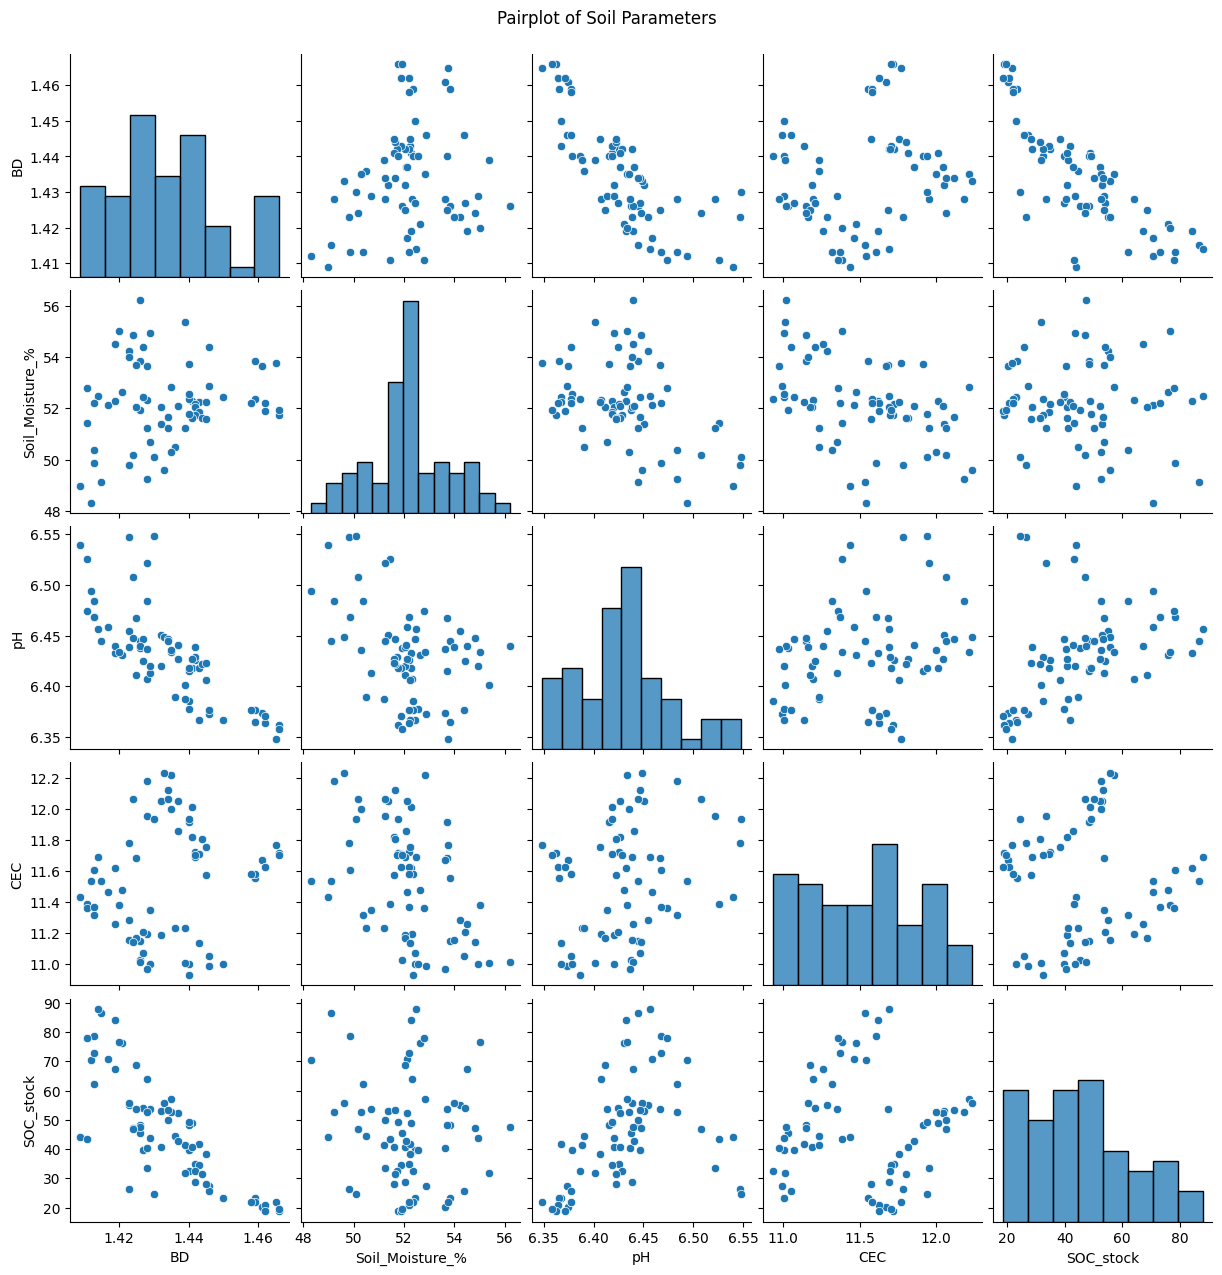

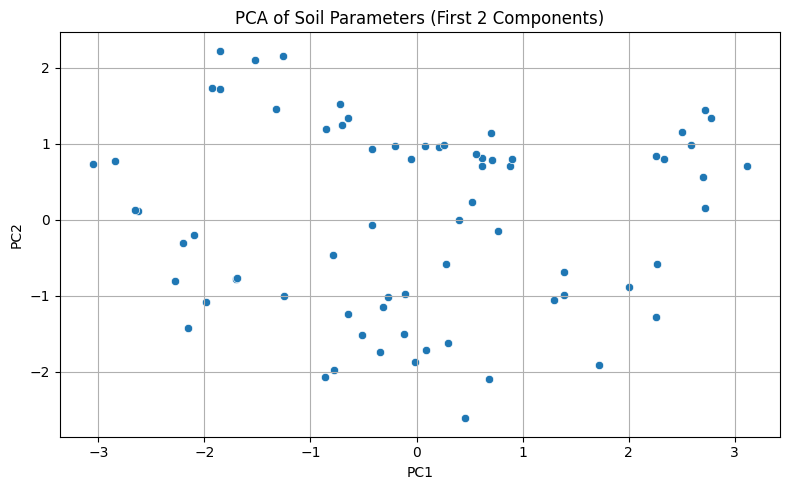

array([0.49225081, 0.29808455])

In [10]:
from seaborn import pairplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Pairplot of soil parameters
pairplot_data = merged[['BD', 'Soil_Moisture_%', 'pH', 'CEC', 'SOC_stock']].dropna()
sns.pairplot(pairplot_data)
plt.suptitle("Pairplot of Soil Parameters", y=1.02)
plt.show()

# 2. PCA Analysis

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pairplot_data)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA result
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot PCA result
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Soil Parameters (First 2 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explained variance
explained_var = pca.explained_variance_ratio_
explained_var


In [11]:
# Step 1: Add Carbon_Credits back into the PCA DataFrame
# Load original dataset with Carbon_Credits
full_df = pd.read_csv('/content/merged.csv')  # adjust if needed

# Standardize the same columns again
from sklearn.preprocessing import StandardScaler
features = ['BD', 'Soil_Moisture_%', 'pH', 'CEC', 'SOC_stock']
X = full_df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Reconstruct PCA DataFrame and merge Carbon_Credits
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Carbon_Credits'] = full_df.loc[X.index, 'Carbon_Credits'].values

# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    pca_df[['PC1', 'PC2']], pca_df['Carbon_Credits'], test_size=0.2, random_state=42
)

# Step 3: Train Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Step 4: Evaluate
print("📊 Linear R² Score:", r2_score(y_test, lr_preds))
print("🌲 Random Forest R² Score:", r2_score(y_test, rf_preds))
print("🚀 XGBoost R² Score:", r2_score(y_test, xgb_preds))


KeyError: 'Carbon_Credits'

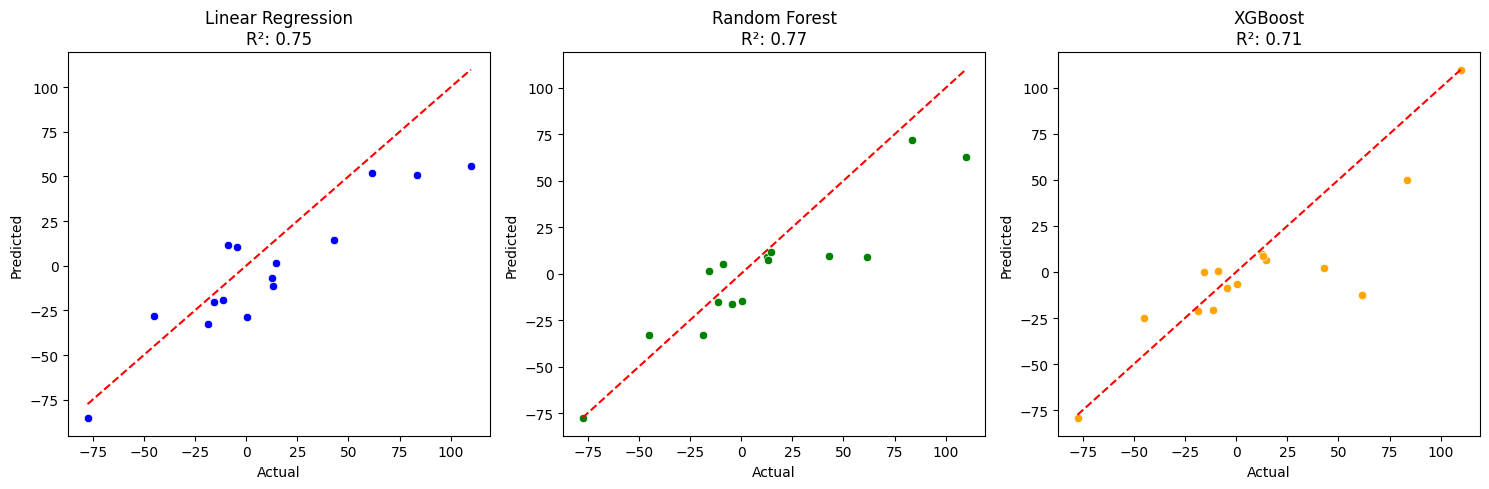

(0.7491319671160247, 0.7685516071149219, 0.7138299927158913)

In [12]:
# Load the soil features file again
features_df = pd.read_csv('/content/merged.csv')
credits_df = pd.read_csv('/content/carbon_credits.csv')

# Merge on year and month
merged = pd.merge(features_df, credits_df[['year', 'month', 'Carbon_Credits_ha']],
                  on=['year', 'month'], how='inner')

# Rename for consistency
merged = merged.rename(columns={'Carbon_Credits_ha': 'Carbon_Credits'})

# Drop NA rows
merged = merged.dropna(subset=['BD', 'Soil_Moisture_%', 'pH', 'CEC', 'SOC_stock', 'Carbon_Credits'])

# Step 1: Standardize features
from sklearn.preprocessing import StandardScaler
features = ['BD', 'Soil_Moisture_%', 'pH', 'CEC', 'SOC_stock']
X = merged[features]
y = merged['Carbon_Credits']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Step 4: Train models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

# Evaluate R² scores
lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Linear
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=lr_preds, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Linear Regression\nR²: {lr_r2:.2f}")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=rf_preds, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Random Forest\nR²: {rf_r2:.2f}")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# XGBoost
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=xgb_preds, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"XGBoost\nR²: {xgb_r2:.2f}")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

# Return R² scores
lr_r2, rf_r2, xgb_r2


In [13]:
merged

,year,month,SOC,BD,Soil_Moisture_%,pH,CEC,SOC_stock,Carbon_Credits
0,2018,3,1.129,1.441,52.297286,6.418,12.011,48.80667,0.65
1,2018,12,1.130,1.426,53.842857,6.445,11.148,48.34140,-0.65
2,2019,1,1.287,1.423,54.236125,6.455,11.288,54.94203,17.76
3,2019,2,1.785,1.421,52.630857,6.431,11.477,76.09455,76.76
4,2019,3,1.493,1.428,52.307000,6.407,11.196,63.96012,42.91
...,...,...,...,...,...,...,...,...,...
66,2024,7,0.572,1.430,50.084600,6.548,11.938,24.53880,-67.04
67,2024,9,1.231,1.428,49.234200,6.484,12.182,52.73604,11.61
68,2024,10,1.165,1.434,51.246600,6.445,12.067,50.11830,4.31
69,2024,11,0.729,1.444,51.632000,6.422,11.805,31.58028,-47.40


In [14]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb, 'xgb_carbon_credit_model.pkl')

# Also save the PCA transformer and scaler
joblib.dump(pca, 'pca_transform.pkl')
joblib.dump(scaler, 'scaler.pkl')

# If using Colab, download to local machine
from google.colab import files
files.download('xgb_carbon_credit_model.pkl')
files.download('pca_transform.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

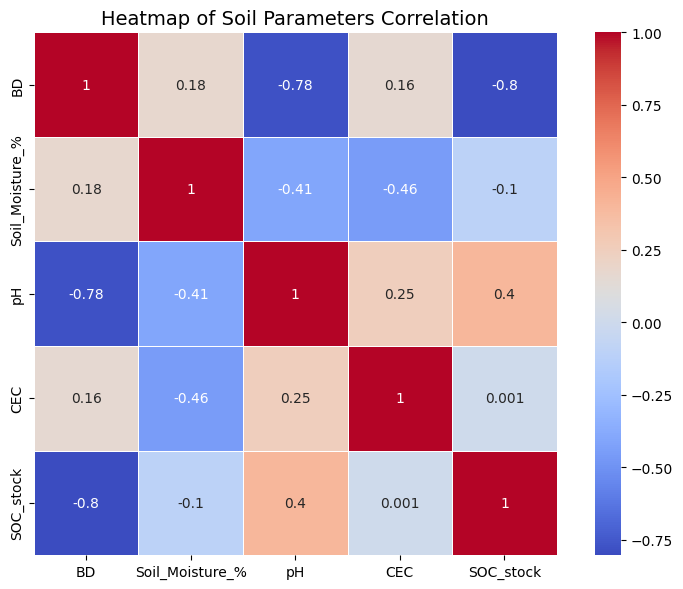

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 2. Select relevant columns
cols = ['BD', 'Soil_Moisture_%', 'pH', 'CEC', 'SOC_stock']
data = merged[cols]

# 3. Compute correlation matrix
corr_matrix = data.corr()

# 4. Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Heatmap of Soil Parameters Correlation', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
carbon=pd.read_csv('/content/carbon_credits.csv')

In [ ]:
carbon.head()

,year,month,SOC_stock,Delta_SOC_MgC_ha,tCO2e_ha,Carbon_Credits_ha,Revenue_USD_ha
0,2018,3,48.81,0.23,0.85,0.65,9.73
1,2018,12,48.34,-0.23,-0.85,-0.65,-9.73
2,2019,1,54.94,6.37,23.37,17.76,266.42
3,2019,2,76.09,27.52,101.00,76.76,1151.40
4,2019,3,63.96,15.39,56.47,42.91,643.72


In [ ]:
carbon.shape

(71, 7)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=merged['year'] + merged['month'] / 12,
    y=merged['SOC_stock'],
    mode='lines+markers',
    name='SOC Stock',
    line=dict(color='#36A2EB')
))
fig.add_hline(y=baseline_soc_stock, line_dash='dash', line_color='red', annotation_text='Baseline (2018)')
fig.update_layout(
    title='SOC Stock Trend in Patna, Bihar (0–30 cm, 2018–2024)',
    xaxis_title='Year',
    yaxis_title='SOC Stock (Mg C/ha)',
    template='plotly_white',
    width=800,
    height=400
)
fig.show()